In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:
df.head(4)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47


In [5]:
df.size

9366

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

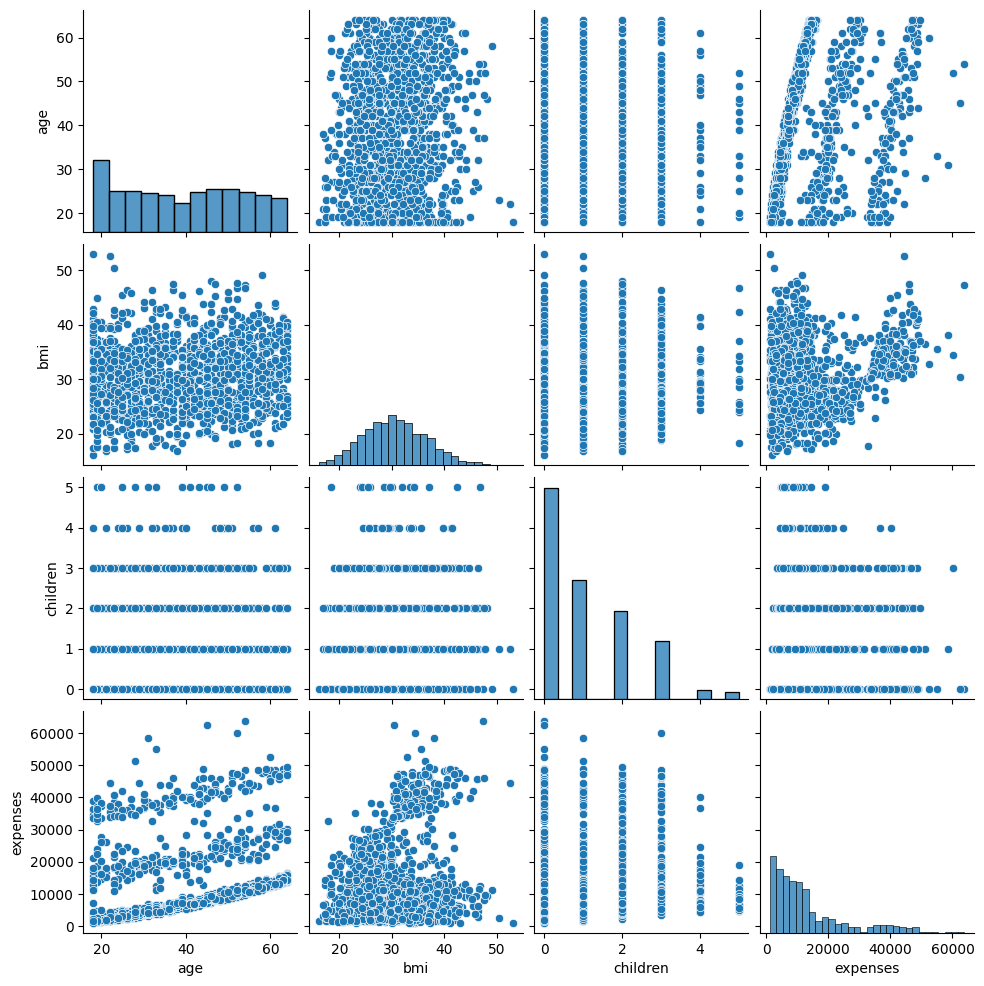

In [7]:
sns.pairplot(df)
plt.show()

<Figure size 3500x3500 with 0 Axes>

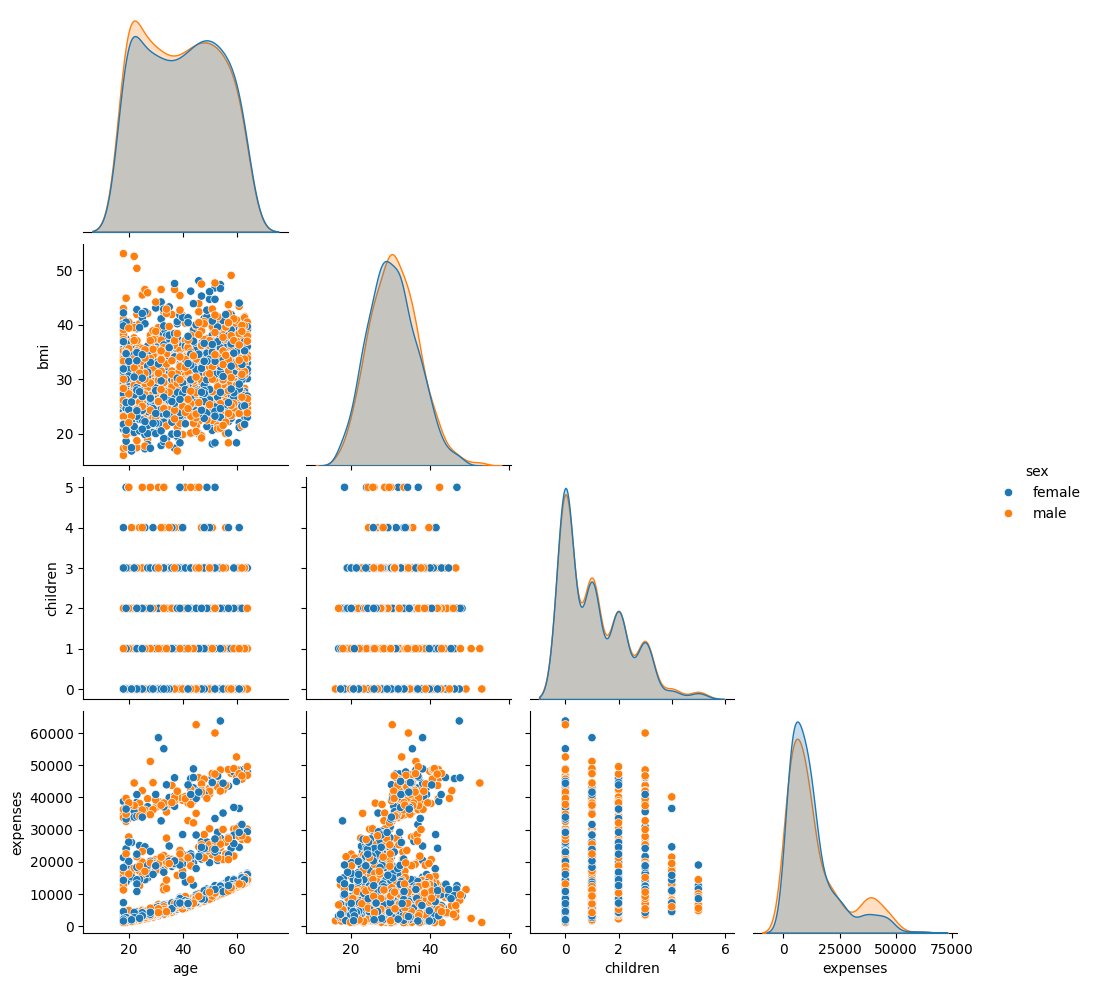

In [8]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='sex', corner = True)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

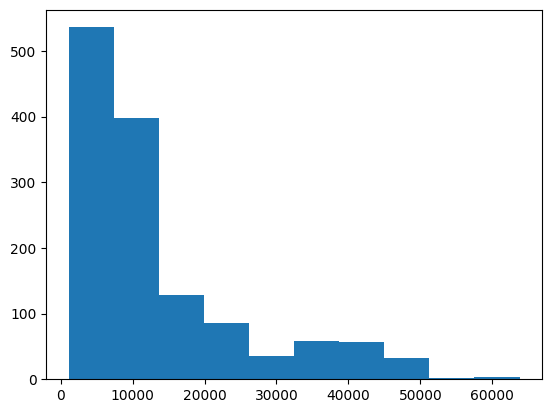

In [9]:
plt.hist(df.expenses)

(array([ 30., 129., 232., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([16.  , 19.71, 23.42, 27.13, 30.84, 34.55, 38.26, 41.97, 45.68,
        49.39, 53.1 ]),
 <BarContainer object of 10 artists>)

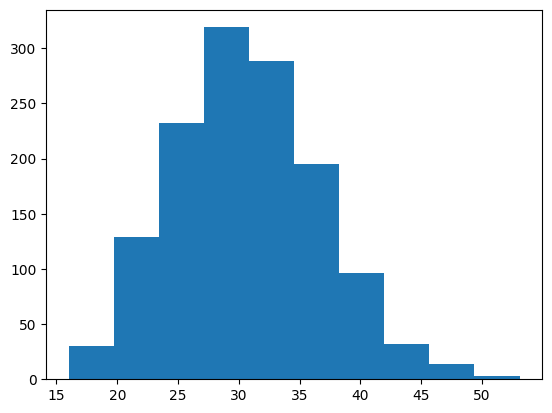

In [10]:
plt.hist(df.bmi)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [13]:
df["expenses"] = df["expenses"].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299009
bmi,0.109341,1.000000,0.012645,0.198577
children,0.042469,0.012645,1.000000,0.067999
expenses,0.299009,0.198577,0.067999,1.000000


<ipython-input-16-63d79fac1a2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr  = df.corr()


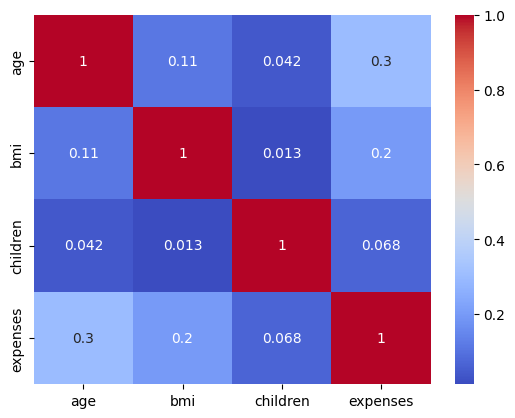

In [16]:
Corr  = df.corr()
sns.heatmap(Corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13269.934230
std,14.049960,6.098382,1.205493,12110.012758
min,18.000000,16.000000,0.000000,1121.000000
25%,27.000000,26.300000,0.000000,4740.000000
50%,39.000000,30.400000,1.000000,9381.500000
75%,51.000000,34.700000,2.000000,16639.250000
max,64.000000,53.100000,5.000000,63770.000000


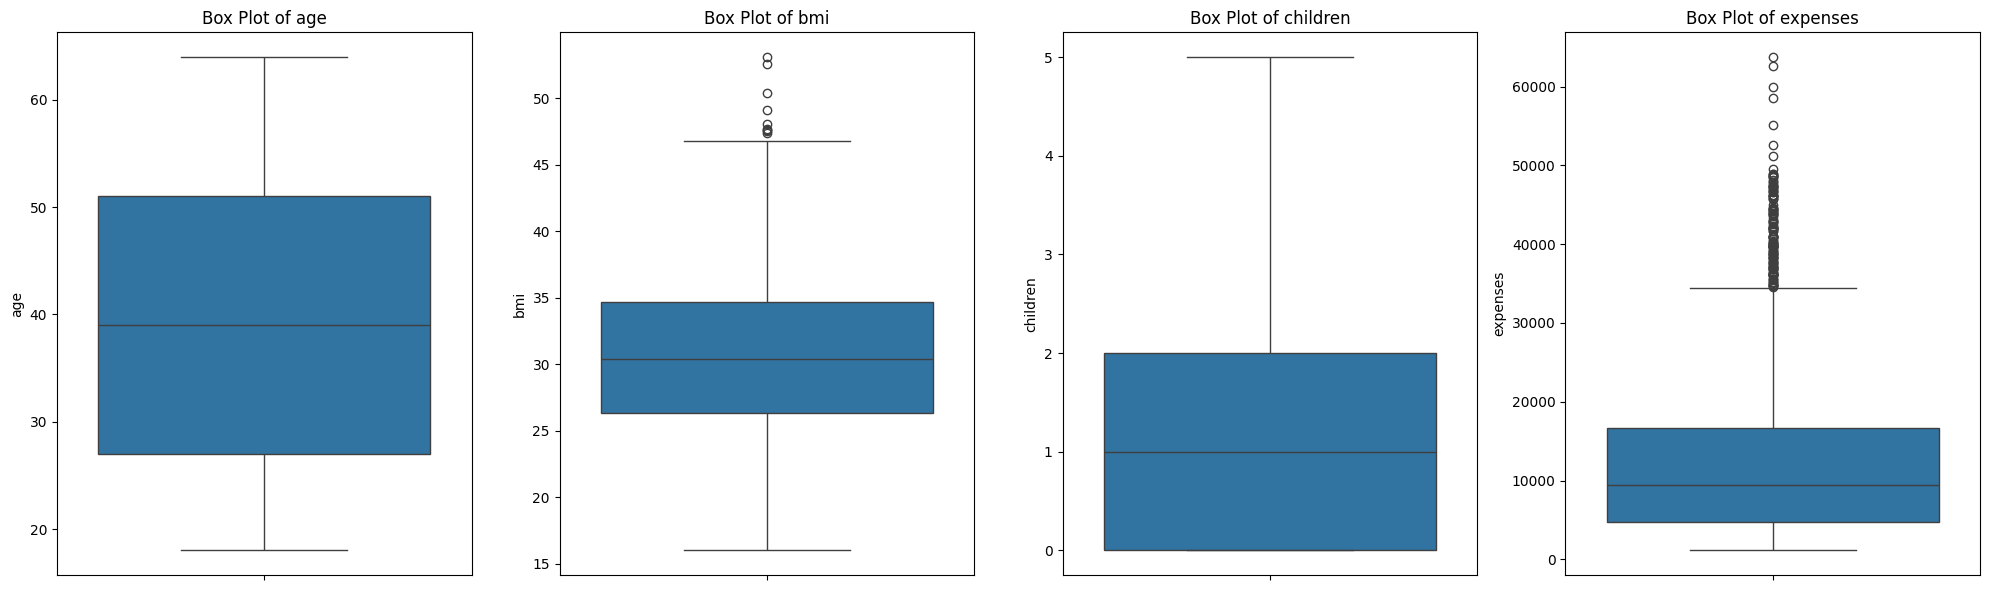

In [18]:
columns_to_plot = ["age","bmi", "children", "expenses"]

plt.figure(figsize=(20, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

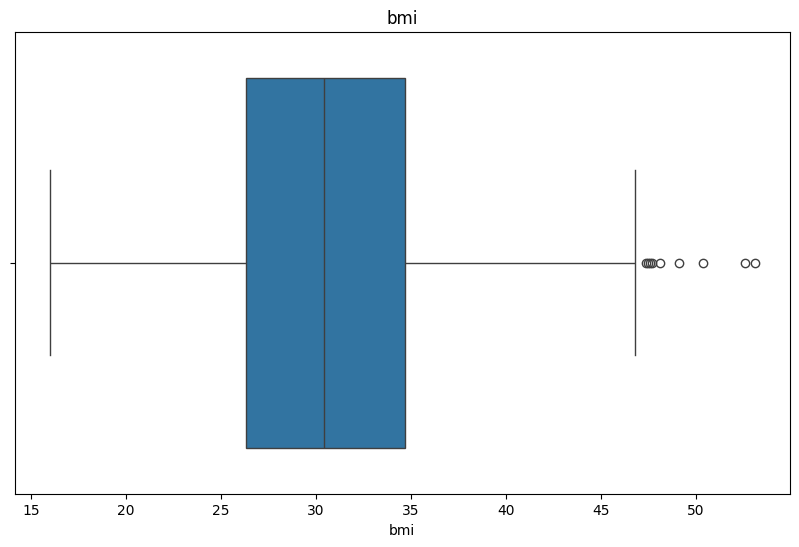

In [19]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_filtered = df[(df['bmi'] >= lower_bound) & (df['bmi'])]

# Plot remove outlier
plt.figure(figsize=(10, 6))  # Adjust the size of your plot
sns.boxplot(x=df_filtered['bmi'])
plt.title('bmi')
plt.show()

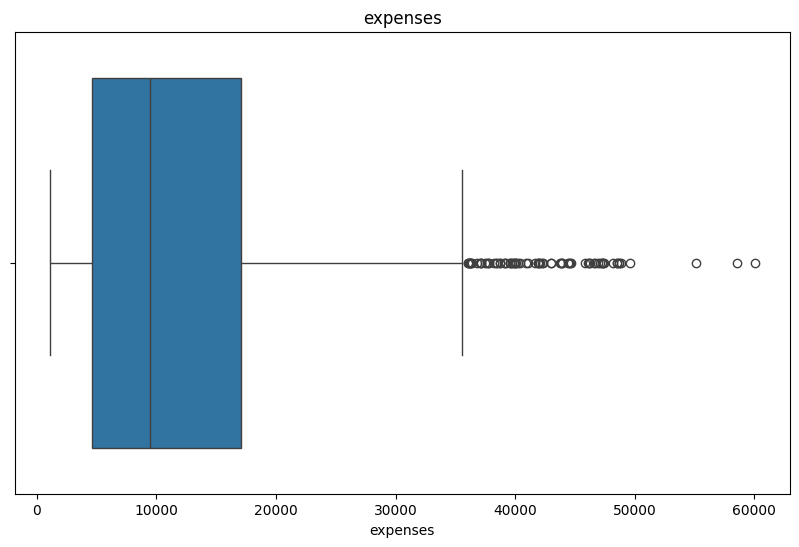

In [20]:
Q1 = df['expenses'].quantile(0.25)
Q3 = df['expenses'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_filtered = df[(df['expenses'] >= lower_bound) & (df['expenses'])]

# Plot remove outlier
plt.figure(figsize=(10, 6))  # Adjust the size of your plot
sns.boxplot(x=df_filtered['expenses'])
plt.title('expenses')
plt.show()

In [21]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884
1,18,male,33.8,1,no,southeast,1725


In [22]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# df[['sex', 'region','smoker']] = enc.fit_transform(df[['sex', 'region','smoker']])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

x=df.drop('expenses', axis=1)
y=df.expenses

#train test split:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=22, test_size=0.2)
print('x_train shape :', x_train.shape)
print('x_test shape : ', x_test.shape)

x_train shape : (1070, 6)
x_test shape :  (268, 6)


In [24]:
x_train.head(3)

,age,sex,bmi,children,smoker,region
425,45,male,24.3,5,no,southeast
851,61,male,32.3,2,no,northwest
22,18,male,34.1,0,no,southeast


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encode_cols = ['sex', 'smoker', 'region']
# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=True), encode_cols)
    ],
    remainder='passthrough'
)

# Apply the column transformer to the training and test data
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
x_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [27]:
x_train.shape

(1070, 11)

In [30]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [29]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    29141
Name: expenses, Length: 1338, dtype: int64

In [31]:
print("Training data",x_train.shape)

print("Test data",x_test.shape)

Training data (1070, 11)
Test data (268, 11)


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
predict = lr.predict(x_test)

In [35]:
print('r2_score : ', r2_score(y_test, predict))
print('MSE : ', mean_squared_error(y_test, predict))

r2_score :  0.7573319458911524
MSE :  35703976.311456665


In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
y_pred = dtr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.614033061267927
MSE :  56787674.37313433


In [38]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = rfr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.8128680258709591
MSE :  27532901.25457761


In [40]:
rfr = RandomForestRegressor(max_depth=5, min_samples_split=12, n_estimators=300)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=12, n_estimators=300)

In [41]:
y_pred = rfr.predict(x_test)
print('r2_score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))

r2_score :  0.8316438153865124
MSE :  24770401.894890487


In [42]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Save the model to a h5 file
filename = 'random_forest_model.h5'
joblib.dump(rfr, filename)

['random_forest_model.h5']